# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\user\AppData\Local\Temp\ipykernel_7940\1440133801.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


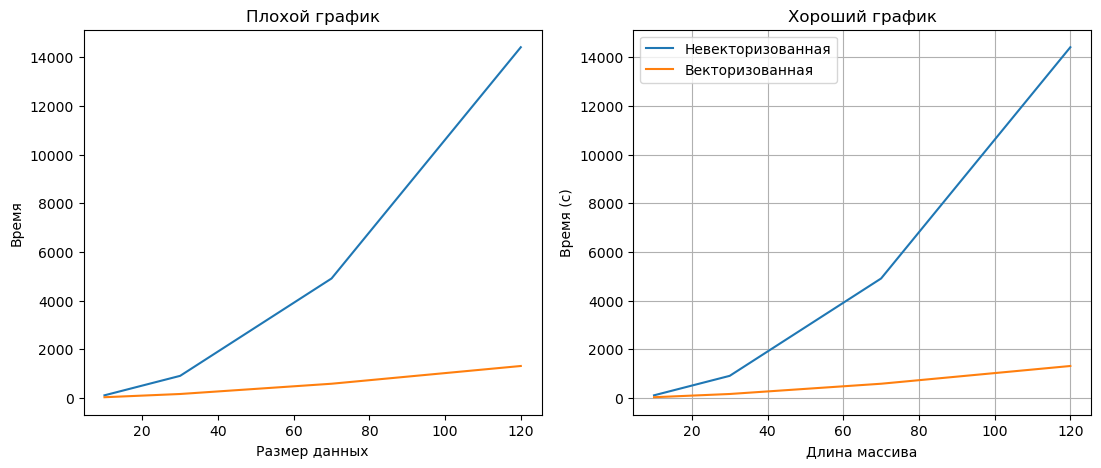

In [13]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()    

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

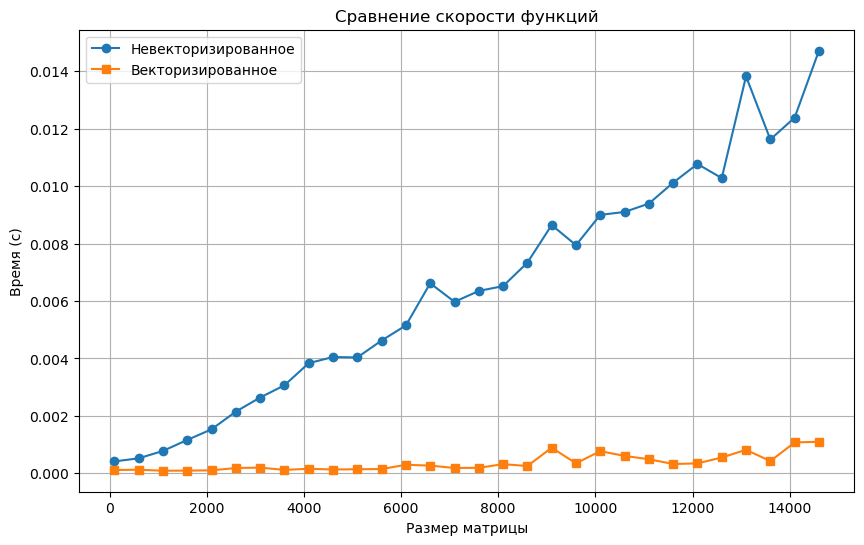

In [100]:
import numpy as np
import time
import matplotlib.pyplot as plt

def classic_method(a, x, y):
    ans = 1
    for i in range(min(x, y)):
        if a[i][i] != 0:
            ans *= a[i][i]
    return ans

def numpy_method(a):
    diagonal_elements = np.diag(a)
    ans = np.prod(diagonal_elements[diagonal_elements != 0])
    return ans

sizes = []
times_classic = []
times_numpy = []

# Прогоняем тесты для разных размеров матриц
for size in range(100, 15001, 500):
    x = y = size  
    a = np.random.rand(x, y)
    
    start_time = time.perf_counter()
    classic_method(a, x, y)
    time_classic = time.perf_counter() - start_time

    start_time = time.perf_counter()
    numpy_method(a)
    time_numpy = time.perf_counter() - start_time

    sizes.append(size)
    times_classic.append(time_classic)
    times_numpy.append(time_numpy)

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_classic, label="Невекторизированное", marker='o')
plt.plot(sizes, times_numpy, label="Векторизированное", marker='s')
plt.xlabel("Размер матрицы")
plt.ylabel("Время (с)")
plt.title("Сравнение скорости функций")
plt.legend()
plt.grid(True)
plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


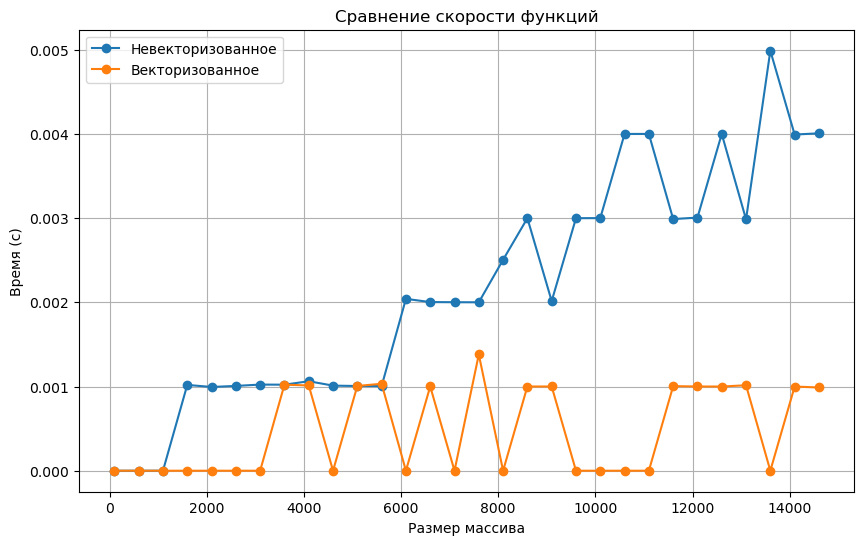

In [97]:
import numpy as np
import time
from collections import Counter
import matplotlib.pyplot as plt
def notvec_solve(x, y):
    cntx = Counter(x)
    cnty = Counter(y)
    if cntx == cnty:
        return 0  # Совпали

def vec_solve(x, y):
    unique_x, countx = np.unique(x, return_counts=True)
    unique_y, county = np.unique(y, return_counts=True)
    if np.array_equal(unique_x, unique_y) and np.array_equal(countx, county):
        return 0  # Совпали

vect_list_2 = list() 
non_vect_list_2 = list() 
data_size = []

for size in range(100, 15001, 500):
    data_size.append(size)
    x = np.random.randint(1, 100, size)
    y = np.random.randint(1, 100, size)
    
    start_time = time.time()
    notvec_solve(x, y)
    non_vect_time = time.time() - start_time
    non_vect_list_2.append(non_vect_time)

    start_time = time.time()
    vec_solve(x, y)
    vect_time = time.time() - start_time
    vect_list_2.append(vect_time)

plt.figure(figsize=(10, 6))
plt.plot(data_size, non_vect_list_2, label="Невекторизованное", marker='o')
plt.plot(data_size, vect_list_2, label="Векторизованное", marker='o')
plt.xlabel("Размер массива")
plt.ylabel("Время (с)")
plt.title("Сравнение скорости функций")
plt.legend()
plt.grid(True)
plt.show()


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

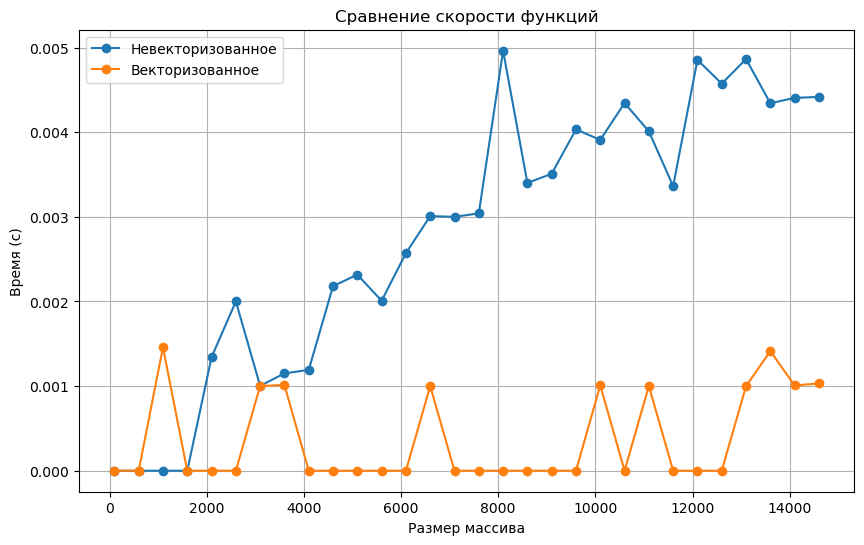

In [110]:
import numpy as np
import time
from collections import Counter
import matplotlib.pyplot as plt
def notvec_solve3(x):
    ans=-6
    for i in range(1, len(x)):
        if x[i-1]==0:
            ans=max(ans, x[i])

    if ans==None:
        return "have not answer"

def vec_solve3(x):
    x = np.array(x)
    mask = (x[:-1] == 0) 
    mb = x[1:][mask]
    if mb.size ==0:
        return "have not answer"
    else:
        return mb.max()

vect_list_2 = list() 
non_vect_list_2 = list() 
data_size = []

for size in range(100, 15001, 500):
    data_size.append(size)
    x = np.random.randint(-5, 15, size)
   
    
    start_time = time.time()
    notvec_solve(x)
    non_vect_time = time.time() - start_time
    non_vect_list_2.append(non_vect_time)

    start_time = time.time()
    vec_solve(x)
    vect_time = time.time() - start_time
    vect_list_2.append(vect_time)

plt.figure(figsize=(10, 6))
plt.plot(data_size, non_vect_list_2, label="Невекторизованное", marker='o')
plt.plot(data_size, vect_list_2, label="Векторизованное", marker='o')
plt.xlabel("Размер массива")
plt.ylabel("Время (с)")
plt.title("Сравнение скорости функций")
plt.legend()
plt.grid(True)
plt.show()


 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

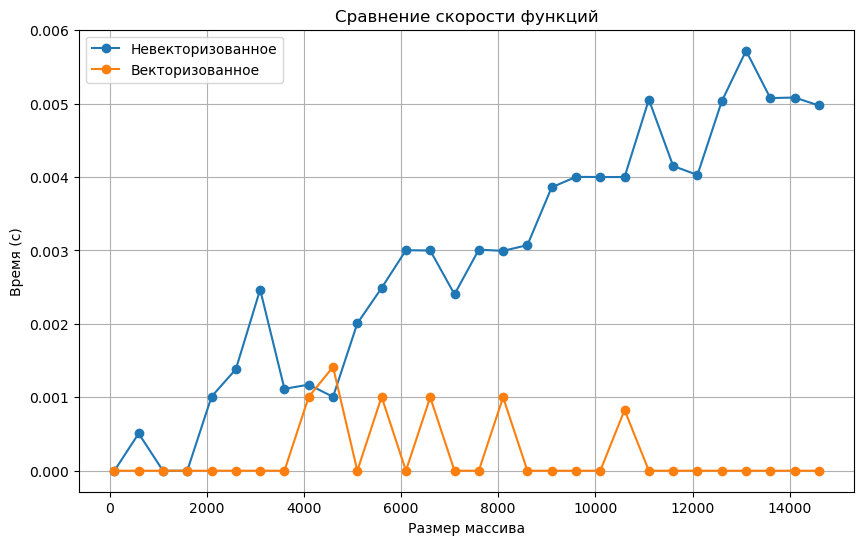

In [123]:
import numpy as np
import time
from collections import Counter
import matplotlib.pyplot as plt
def notvec_solve5(x):
    cx=[]
    cy=[]
    for i in range(1, len(x)):
        if a[i]==a[i-1]:
            ++cy.back()
        else:
            cx.append(a[i])
    return(cx)
    return(cy)       

def vec_solve5(x):
    x = np.array(x)
    changes = np.diff(a)
    change_indices = np.where(changes != 0)[0] + 1  # +1, потому что diff уменьшает размер на 1

    cx = np.insert(a[change_indices], 0, a[0])

    cy = np.diff(np.concatenate(([0], change_indices, [len(a)])))

    return(cx)
    return(cy)

vect_list_2 = list() 
non_vect_list_2 = list() 
data_size = []

for size in range(100, 15001, 500):
    data_size.append(size)
    x = np.random.randint(0, 10, size)
   
    
    start_time = time.time()
    notvec_solve(x)
    non_vect_time = time.time() - start_time
    non_vect_list_2.append(non_vect_time)

    start_time = time.time()
    vec_solve(x)
    vect_time = time.time() - start_time
    vect_list_2.append(vect_time)

plt.figure(figsize=(10, 6))
plt.plot(data_size, non_vect_list_2, label="Невекторизованное", marker='o')
plt.plot(data_size, vect_list_2, label="Векторизованное", marker='o')
plt.xlabel("Размер массива")
plt.ylabel("Время (с)")
plt.title("Сравнение скорости функций")
plt.legend()
plt.grid(True)
plt.show()


 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [ ]:
# code here

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
# code here